In [ ]:
from google.colab import drive
drive.mount('/content/drive')#conecting google collab notebook with drive for extraction of training and testing data

Mounted at /content/drive


In [ ]:
#This notebook demonstrates the process of building a face recognition system using the MTCNN face detector and FaceNet model with SVM classification. Here's a summary of the key steps:

#Import Dependencies and Initialize MTCNN:

#The notebook starts by importing necessary libraries and initializing the MTCNN face detector, which is a deep learning-based method for detecting faces and facial landmarks.
#Loading and Preprocessing Data:
'''
The FACELOADING class is defined to load face images from a directory, extract faces using MTCNN, and prepare the data for training. Images are resized to a standard size (160x160) required by FaceNet.
Visualization and Data Exploration:

The plot_images method in FACELOADING class is used to visualize the loaded face images.
Generating Face Embeddings:

The FaceNet model is used to generate 512-dimensional embeddings for each face image in the dataset.
Splitting Data for Training and Testing:

The dataset is split into training and testing sets using train_test_split.
Training SVM Classifier:

A linear SVM classifier is trained on the face embeddings to recognize faces.
Evaluation:

The accuracy of the trained SVM model is evaluated on both training and testing sets using accuracy_score.
Testing with New Images:

The trained model is tested with a new image to demonstrate its performance on unseen data.'''

In [ ]:
!pip install mtcnn
#MTCNN (Multi-task Cascaded Convolutional Networks) is a popular deep learning-based method for detecting faces and facial landmarks in images.
#It is widely used for its accuracy and robustness in various conditions,
#such as different lighting, poses, and occlusions.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 19.5 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#importing necessary dependancies.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'#way to control the verbosity of TensorFlow's logging output

In [ ]:
img = cv.imread("/content/drive/MyDrive/face_recognition/dataset/sardor_abdirayimov/5.png")
# opencv BGR channel format and plt reads images as RGB channel format

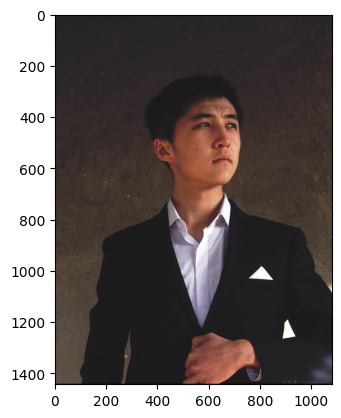

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)#conversion of color from BGR to RGB as matplotlib supports RGB format
plt.imshow(img) # RGB

In [ ]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)#is using the MTCNN face detector to identify faces within the image

1/1 [==============================] - 1s 559ms/step


In [ ]:
results
#results list contains one dictionary, which provides detailed information about the detected face
#box': [463, 307, 259, 353] means the face is located at coordinates (x=463, y=307) with a width of 259 pixels and a height of 353 pixels.
#confidence': 0.9999786019325256 indicates a very high confidence level (almost 1), suggesting that the detected face is highly likely to be a true positive.
#keypoints' contains the coordinates of significant facial landmarks:
#'left_eye': (581, 433)
#'right_eye': (684, 432)
#'nose': (669, 493)
#'mouth_left': (611, 577)
#'mouth_right': (683, 573)

[{'box': [463, 307, 259, 353],
  'confidence': 0.9999786019325256,
  'keypoints': {'left_eye': (581, 433),
   'right_eye': (684, 432),
   'nose': (669, 493),
   'mouth_left': (611, 577),
   'mouth_right': (683, 573)}}]

In [ ]:
x,y,w,h = results[0]['box']#to extract these values 'box': [463, 307, 259, 353]

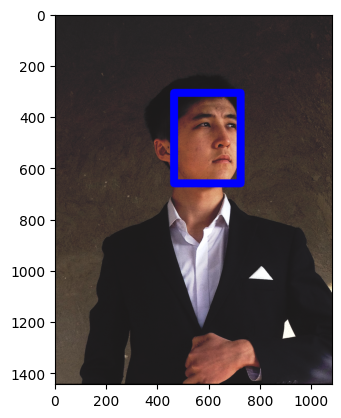

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 30)
plt.imshow(img)
#Drawing a rectangle on an image to highlight the detected face and then displaying the image using Matplotlib

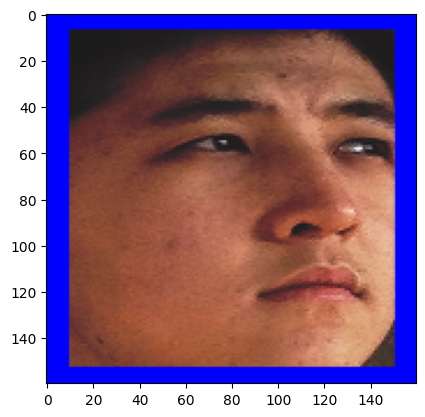

In [ ]:
my_face = img[y:y+h, x:x+w]
#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)
#crop the detected face from the image, resize it to the required size (160x160 for FaceNet), and then display it using Matplotlib

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
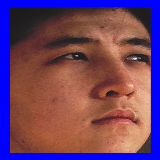

In [ ]:
my_face

In [ ]:
class FACELOADING:

    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()#Class Initialization
#__init__ method:
#Takes a directory path as input and sets up some initial values.
#self.directory stores the provided directory path.
#self.target_size is set to (160, 160), which is the size to which faces will be resized.
#self.X and self.Y are empty lists to store images and their corresponding labels.
#self.detector initializes an MTCNN face detector.


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr

#extract_face method
#Takes a filename (path to an image) as input.
#Reads the image, converts its color format, and detects faces in the image.
#Extracts the first detected face, resizes it to self.target_size, and returns the resized face.

    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES
#load_faces method
#Takes a directory path as input.
#Iterates through all image files in the directory, tries to extract faces from each image using extract_face, and collects these faces in a list.
#Returns the list of faces.

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)
#load_classes method
#Iterates through subdirectories in the main directory.
#For each subdirectory, it loads all faces using load_faces and assigns the subdirectory name as the label for each face.
#Extends self.X with faces and self.Y with corresponding labels.
#Converts self.X and self.Y to NumPy arrays and returns them.

    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 3
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')
#plot_images method
#Plots all loaded face images in a grid format using Matplotlib.
#The grid has 3 columns and enough rows to fit all images.

In [ ]:
faceloading = FACELOADING("/content/drive/MyDrive/face_recognition/dataset")
X, Y = faceloading.load_classes()
#loading the images according to the format specified in above class FACELOADING

1/1 [==============================] - 1s 533ms/step


1/1 [==============================] - 0s 42ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 26ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 27ms/step
Loaded successfully: 10
1/1 [==============================] - 0s 31ms/step
Loaded successfully: 10


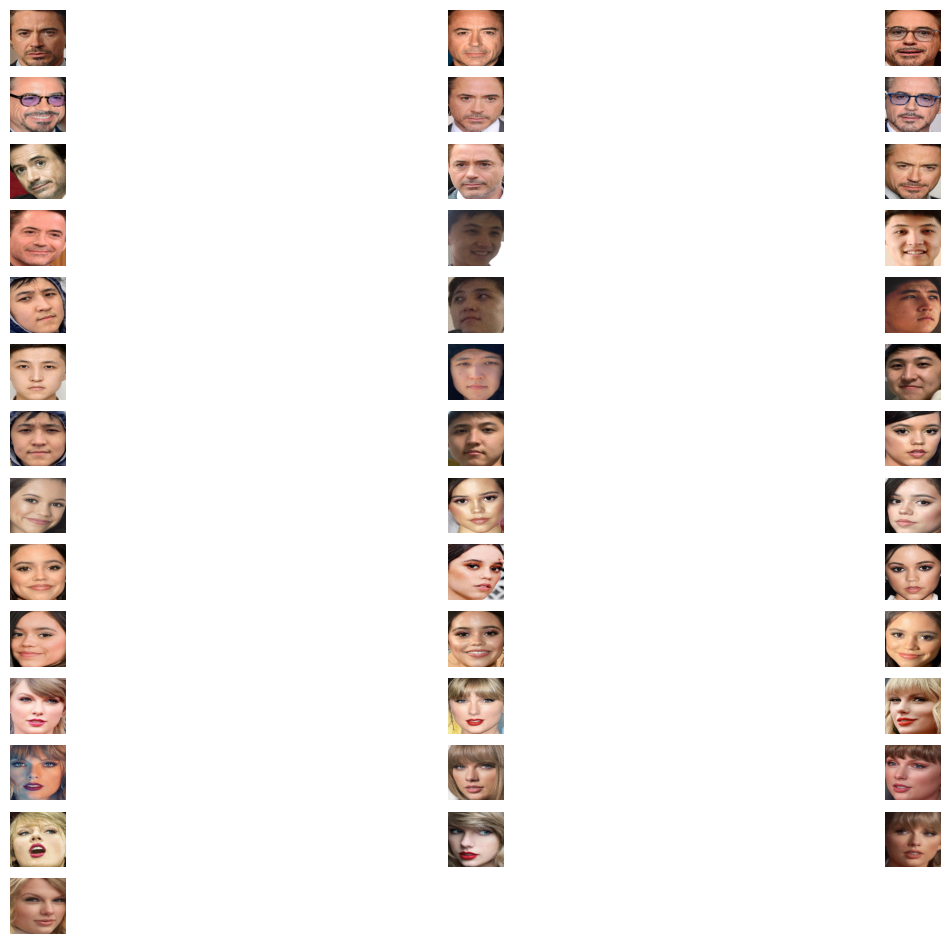

In [ ]:
plt.figure(figsize=(16,12))
for num,image in enumerate(X):
    ncols = 3
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')
#By running this code, you'll create a plot where each image loaded by FACELOADING is displayed in a grid layout, with multiple rows and columns. The images are displayed without any axis ticks or labels.

In [ ]:
#FaceNEt Part
#FaceNet is a deep learning model designed for face recognition tasks. Developed by researchers at Google, it uses a convolutional neural network (CNN)
# architecture to learn discriminative features directly from face images. FaceNet is specifically designed to generate embeddings,
#which are numerical representations of faces in a high-dimensional space where similar faces are closer together and dissimilar faces are farther apart.

In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10369 sha256=82ca5a4751b782a174b8bb0fec110c0fcab5d2a6f22c11f8a781453c0d1f3ca1
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3) converts the image data type to float32 for compatibility with the model
    face_img = np.expand_dims(face_img, axis=0)#It expands the dimensions of the face image to make it compatible with the model's input shape. This converts the 3D image (160x160x3) to a 4D array (1x160x160x3).
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)#The expanded face image is passed through the FaceNet model using embedder.embeddings(face_img),
    #This generates a 512-dimensional embedding vector for the input face image, representing its unique features
    return yhat[0] # 512D image (1x1x512)

In [ ]:
EMBEDDED_X = []
#generates embeddings for all face images in the dataset X using the get_embedding function and stores them in a NumPy array named EMBEDDED_X
for img in X:
    EMBEDDED_X.append(get_embedding(img))#For each face image, it calls the get_embedding function to generate a 512-dimensional embedding vector

EMBEDDED_X = np.asarray(EMBEDDED_X)#After embeddings are generated for all face images, the list EMBEDDED_X is converted to a NumPy array using np.asarray()
#This results in a 2D array where each row represents the embedding vector for a single face image.

1/1 [==============================] - 0s 215ms/step


In [ ]:
np.savez_compressed('faces_embeddings_done_4classes.npz', EMBEDDED_X, Y)
#saves the embeddings generated for face images along with their corresponding labels (Y) into a compressed NumPy archive file named 'faces_embeddings_done_4classes.npz

In [ ]:
#SVM


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)#to transform the categorical labels (Y) into numerical representations

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)
#X_train: Embedded face data for training.
#X_test: Embedded face data for testing.
#Y_train: Labels corresponding to X_train.
#Y_test: Labels corresponding to X_test.

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)
#to train a linear SVM model for face recognition
#kernel='linear': This specifies that the SVC will use a linear kernel, which means it will attempt to find a linear decision boundary between classes.
#probability=True: This enables probability estimates, allowing the SVC to output probabilities for each class prediction. This is useful for certain evaluation metrics and decision-making processes.

SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)
#use the trained SVM model (model) to make predictions on both the training and testing datasets

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)
#An accuracy score of 1 indicates that the SVM model correctly predicted all labels in the training dataset.
#An accuracy score of 1 means that all predicted labels match the true labels in the training set, indicating perfect performance on the training data.

1.0

In [ ]:
accuracy_score(Y_test,ypreds_test)
#An accuracy score of 1 on the testing dataset indicates that the SVM model correctly predicted all labels in the testing set as well. Just like with the training dataset, an accuracy score of 1 on the testing data
#means that all predicted labels match the true labels in the testing set, showing perfect performance on the testing data.

1.0

In [ ]:
t_im = cv.imread("/content/drive/MyDrive/face_recognition/sardor_test.jpg")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)#Reading and Converting the Image both 2 lines
x,y,w,h = detector.detect_faces(t_im)[0]['box']#this line uses the detector ( instance of MTCNN) to detect faces in the image.

1/1 [==============================] - 0s 48ms/step


In [ ]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)
#extracts a face from an image, resizes it, and generates its embedding

1/1 [==============================] - 0s 188ms/step


In [ ]:
test_im = [test_im]
ypreds = model.predict(test_im)
#testing of model predictions

In [ ]:
ypreds#we got our predictions in form of array

array([2])

In [ ]:
encoder.inverse_transform(ypreds)#to convert it into our desired readable form or label of image

array(['sardor_abdirayimov'], dtype='<U18')

In [ ]:
import pickle
#save the model
with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)